# Case Study 2

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics


In [2]:
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#Placing the data into a dataframe
features = pd.DataFrame(wine.data,columns = wine.feature_names)
target = pd.DataFrame(wine.target,columns =['target'])
#Contacting the features and target into a single data frame
df = pd.concat([features,target], axis=1)

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
df.head(30)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [7]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

# Data Preprocessing

In [8]:
#Using the z score for checking potiential outliers
z = np.abs(stats.zscore(df))
print(z)

[[1.51861254 0.5622498  0.23205254 ... 1.84791957 1.01300893 1.21394365]
 [0.24628963 0.49941338 0.82799632 ... 1.1134493  0.96524152 1.21394365]
 [0.19687903 0.02123125 1.10933436 ... 0.78858745 1.39514818 1.21394365]
 ...
 [0.33275817 1.74474449 0.38935541 ... 1.48544548 0.28057537 1.37386437]
 [0.20923168 0.22769377 0.01273209 ... 1.40069891 0.29649784 1.37386437]
 [1.39508604 1.58316512 1.36520822 ... 1.42894777 0.59516041 1.37386437]]


In [9]:
#Z score greater in the range -3 and 3 indicates an unsual amount of distance from the center, meaning an outlier.
# For example the the output array basically means z[25][2] has an outlier where 25 is the row and 2 is the column.
#Note that we have quite a few outliers in the 2nd feature.
threshold = 3
print(np.where(z > 3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123, 158]), array([ 2,  2,  4,  3,  4,  8, 10,  2,  6,  1,  9]))


In [10]:
#Checking for outliers using interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

alcohol                           1.3150
malic_acid                        1.4800
ash                               0.3475
alcalinity_of_ash                 4.3000
magnesium                        19.0000
total_phenols                     1.0575
flavanoids                        1.6700
nonflavanoid_phenols              0.1675
proanthocyanins                   0.7000
color_intensity                   2.9800
hue                               0.3375
od280/od315_of_diluted_wines      1.2325
proline                         484.5000
target                            2.0000
dtype: float64


In [11]:
#True indicates outliers, returns boolean
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

     alcohol  malic_acid    ash  ...  od280/od315_of_diluted_wines  proline  target
0      False       False  False  ...                         False    False   False
1      False       False  False  ...                         False    False   False
2      False       False  False  ...                         False    False   False
3      False       False  False  ...                         False    False   False
4      False       False  False  ...                         False    False   False
..       ...         ...    ...  ...                           ...      ...     ...
173    False       False  False  ...                         False    False   False
174    False       False  False  ...                         False    False   False
175    False       False  False  ...                         False    False   False
176    False       False  False  ...                         False    False   False
177    False       False  False  ...                         False    False 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,True,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data cleaning

In [12]:
#Removed the outliers using the zscore
df_1 = df[(z < 3).all(axis=1)]

In [13]:
df.shape

(178, 14)

In [14]:
df_1.shape

(168, 14)

In [15]:
#Similary, removing outliers found from the IQR
df_2 = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_2.shape

(161, 14)

Text(0.5, 0, 'Ash')

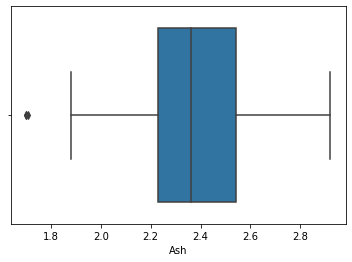

In [16]:
#Lets check if the outliers have been removed, a boxplot on the column 2 to check if it worked.
ax = sns.boxplot(x=df_1['ash'])
ax.set_xlabel('Ash')

Text(0.5, 0, 'Ash')

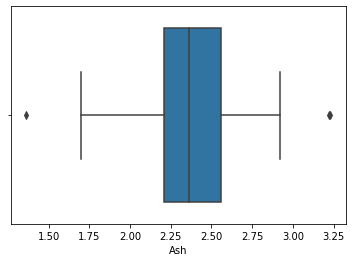

In [17]:
#lets compare it to the original data frame to check if the outliers have been reduced.
ax = sns.boxplot(x=df['ash'])
ax.set_xlabel('Ash')
# we can conclude yes

In [18]:
#After removing the outlier the min and max values are now not very high.
df_2.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.040373,2.306832,2.363292,19.232298,98.534161,2.290373,2.043789,0.358137,1.548075,5.014161,0.959106,2.628820,759.111801,0.900621
std,0.797841,1.048263,0.241205,3.014706,12.365290,0.632366,0.985649,0.121810,0.525859,2.117379,0.218049,0.709052,323.866465,0.784259
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000,0.000000
25%,12.370000,1.610000,2.230000,17.100000,88.000000,1.720000,1.220000,0.270000,1.240000,3.270000,0.790000,2.010000,502.000000,0.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.350000,2.140000,0.340000,1.530000,4.800000,0.980000,2.780000,675.000000,1.000000
75%,13.710000,3.030000,2.530000,21.000000,106.000000,2.800000,2.910000,0.430000,1.870000,6.200000,1.120000,3.180000,1035.000000,2.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.960000,10.520000,1.450000,4.000000,1680.000000,2.000000


# Performing a group box plot for all the features, to visualize outliers. 
#Magenisum and proline features have been exlucded due to their high values

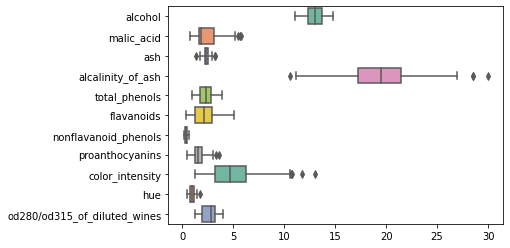

In [19]:
df_2_group1 = df[['magnesium']]
df_2_group2 = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines']]
df_2_group3 = df[['proline']]

ax1 = sns.boxplot(data=df_2_group2, orient="h", palette="Set2")

In [20]:
#Lets rename the feature names to make it simpler to access them. For future purposes.
df_3 = df_2.rename(columns = {"alcohol": "AL",
                                  "malic_acid":"MA",
                                  "ash": "A",'alcalinity_of_ash':'AA','magnesium':'MG','total_phenols':'TP','flavanoids':'F','nonflavanoid_phenols':'NP','proanthocyanins':'P','color_intensity':'CI','hue':'H','od280/od315_of_diluted_wines':'DW','proline':'P1'})

In [21]:
#Much better to have a quick glance at data at any point.
df_3.head(10)

,AL,MA,A,AA,MG,TP,F,NP,P,CI,H,DW,P1,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


# Univarient visualization for each of the features with target

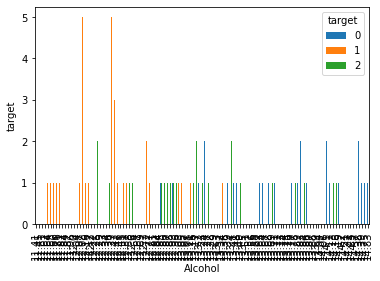

In [22]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.AL,df_3.target).plot(kind='bar')
plt.xlabel('Alcohol')
plt.ylabel('target')
plt.savefig('AL_target')

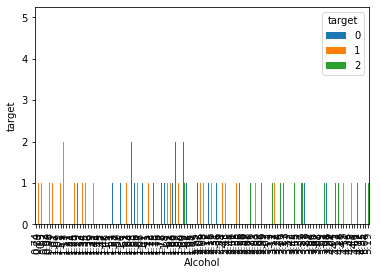

In [23]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.MA,df_3.target).plot(kind='bar')
plt.xlabel('Alcohol')
plt.ylabel('target')
plt.savefig('Malic acid')

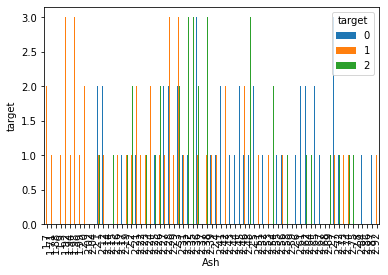

In [24]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.A,df_3.target).plot(kind='bar')
plt.xlabel('Ash')
plt.ylabel('target')
plt.savefig('Ash')

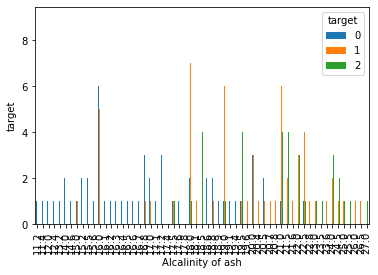

In [25]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.AA,df_3.target).plot(kind='bar')
plt.xlabel('Alcalinity of ash')
plt.ylabel('target')
plt.savefig('AA')

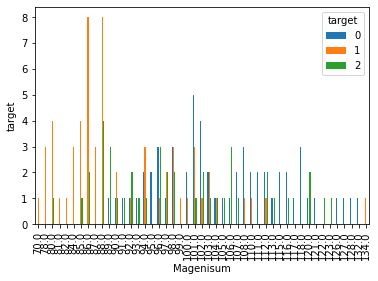

In [26]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.MG,df_3.target).plot(kind='bar')
plt.xlabel('Magenisum')
plt.ylabel('target')
plt.savefig('MG')

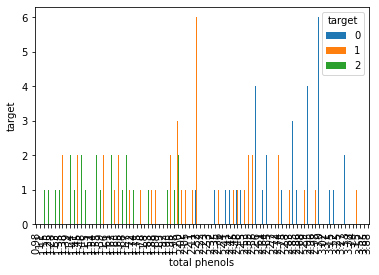

In [27]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.TP,df_3.target).plot(kind='bar')
plt.xlabel('total phenols')
plt.ylabel('target')
plt.savefig('TP')

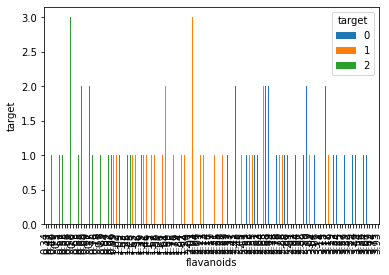

In [28]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.F,df_3.target).plot(kind='bar')
plt.xlabel('flavanoids')
plt.ylabel('target')
plt.savefig('F')

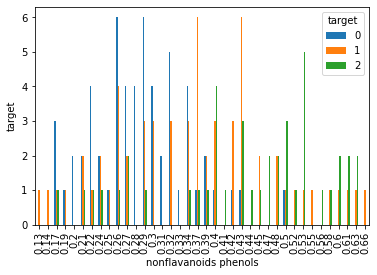

In [29]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.NP,df_3.target).plot(kind='bar')
plt.xlabel('nonflavanoids phenols')
plt.ylabel('target')
plt.savefig('NP')

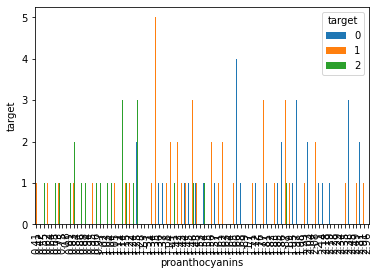

In [30]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.P,df_3.target).plot(kind='bar')
plt.xlabel('proanthocyanins')
plt.ylabel('target')
plt.savefig('P')

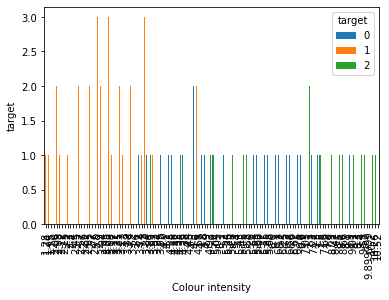

In [31]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.CI,df_3.target).plot(kind='bar')
plt.xlabel('Colour intensity')
plt.ylabel('target')
plt.savefig('CI')

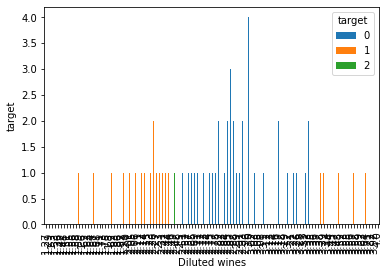

In [32]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.DW,df_3.target).plot(kind='bar')
plt.xlabel('Diluted wines')
plt.ylabel('target')
plt.savefig('DW')

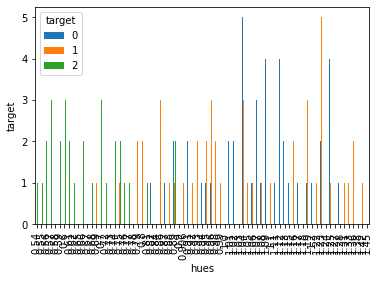

In [33]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.H,df_3.target).plot(kind='bar')
plt.xlabel('hues')
plt.ylabel('target')
plt.savefig('H')

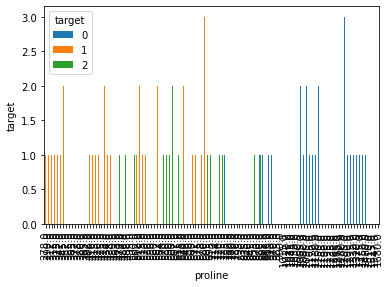

In [34]:
#Visualizing the data
%matplotlib inline
pd.crosstab(df_3.P1,df_3.target).plot(kind='bar')
plt.xlabel('proline')
plt.ylabel('target')
plt.savefig('P1')

# Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [36]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
X_std.head()

NameError: ignored

# test train split followed by metrics for logistic regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state = 7)

In [ ]:
regr = LogisticRegression()

In [ ]:
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [ ]:
print('Accuracy of logistic regression on test set with standardized features: {:.2f}'.format(regr.score(x_test, y_test)))

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
targets = ['class 1','class 2','class 3']
print(classification_report(y_test,y_pred,target_names=targets))

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)